# Predictive Modeling for Disease Diagnosis

The objective of this project is to develop a predictive model that can accurately classify individuals into diseased or non-diseased categories based on their health attributes.

In [64]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix

%matplotlib inline

## Load training and test datasets

In [65]:

df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')

## Display basic information about the datasets

In [66]:

print("Training Dataset Info:")
df_train.info()

print("\nTest Dataset Info:")
df_test.info()


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  I

In [67]:
df_train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [69]:
df_train.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [70]:
df_test.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [71]:
#get the number of differnt diseases
df_train['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [72]:
#average rate of different components based on differnt disease
df_train.groupby('Disease').mean()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Disease,,,,,,,,,,,,,,,,,,,,,
Anemia,0.258921,0.341752,0.486967,0.573435,0.321244,0.404977,0.327209,0.532201,0.475732,0.537777,...,0.338437,0.352863,0.359660,0.598541,0.313849,0.459650,0.665770,0.408750,0.395222,0.463713
Diabetes,0.438498,0.454255,0.621358,0.445661,0.502450,0.415727,0.593297,0.603870,0.423174,0.643689,...,0.426915,0.546585,0.493463,0.426242,0.562105,0.484656,0.531292,0.450073,0.603145,0.351026
Healthy,0.426210,0.394105,0.575743,0.600604,0.627425,0.642466,0.565125,0.326884,0.371175,0.543801,...,0.422262,0.429152,0.463915,0.589613,0.345432,0.422059,0.515342,0.429781,0.416132,0.425595
Thalasse,0.361553,0.334211,0.636288,0.474129,0.605361,0.548459,0.549945,0.523751,0.690439,0.499853,...,0.275963,0.421222,0.401945,0.512812,0.510697,0.449088,0.564475,0.380793,0.395739,0.441164
Thromboc,0.275675,0.634323,0.774260,0.095876,0.594539,0.632704,0.601235,0.416061,0.457412,0.670721,...,0.516482,0.523185,0.313274,0.747346,0.581704,0.419925,0.759035,0.559980,0.520617,0.585555


In [73]:
#seperating the data and labels
X = df_train.drop(columns = 'Disease', axis=1)
Y = df_train["Disease"]


In [74]:
X.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970


In [75]:
Y.head()

0     Healthy
1    Diabetes
2    Thalasse
3      Anemia
4    Thalasse
Name: Disease, dtype: object

In [76]:
X.shape

(2351, 24)

In [77]:
numerical_cols = df_train.select_dtypes(include='float64').columns

## Correlation matrix

In [78]:
correlation_matrix = df_train[numerical_cols].corr()
correlation_matrix

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000000,0.201850,0.126152,0.094962,0.032513,-0.045155,0.166459,-0.000982,-0.155353,0.053480,...,-0.144596,0.047266,0.102640,-0.139997,-0.005195,-0.052142,-0.025573,-0.221046,0.222248,0.211177
Cholesterol,0.201850,1.000000,0.207664,0.014980,0.011045,0.121565,0.090864,-0.074678,-0.299422,0.147722,...,0.168469,0.013902,0.168118,0.146531,0.057961,0.155788,-0.154108,-0.021709,-0.071308,-0.211815
Hemoglobin,0.126152,0.207664,1.000000,0.121879,0.059539,0.052803,-0.016702,-0.130591,0.188262,0.052365,...,0.154553,0.052063,0.302901,-0.011438,0.020301,-0.095531,0.002655,-0.059247,-0.096180,-0.049385
Platelets,0.094962,0.014980,0.121879,1.000000,-0.081205,0.041547,-0.186816,0.131429,-0.079204,-0.015264,...,-0.242272,0.098628,-0.205245,-0.196438,-0.097731,0.081491,-0.096443,-0.020369,-0.014930,-0.020203
White Blood Cells,0.032513,0.011045,0.059539,-0.081205,1.000000,0.068023,0.249787,-0.011324,0.014312,-0.041609,...,0.090920,0.034506,-0.030755,-0.037955,0.032459,0.152566,0.198235,0.080568,-0.122723,0.021788
Red Blood Cells,-0.045155,0.121565,0.052803,0.041547,0.068023,1.000000,-0.084555,-0.154514,-0.020241,-0.123454,...,0.067237,0.148803,0.169262,0.252507,0.178947,-0.191404,0.036679,-0.110708,-0.104942,-0.175794
Hematocrit,0.166459,0.090864,-0.016702,-0.186816,0.249787,-0.084555,1.000000,0.055150,-0.099970,-0.025486,...,-0.112917,-0.027707,-0.033376,0.036883,-0.034960,-0.107572,-0.099788,-0.019058,0.198434,-0.079240
Mean Corpuscular Volume,-0.000982,-0.074678,-0.130591,0.131429,-0.011324,-0.154514,0.055150,1.000000,0.001776,0.141168,...,-0.143843,-0.064528,-0.197323,-0.097428,0.015310,-0.002724,-0.167693,-0.000606,0.137077,-0.101596
Mean Corpuscular Hemoglobin,-0.155353,-0.299422,0.188262,-0.079204,0.014312,-0.020241,-0.099970,0.001776,1.000000,-0.021991,...,0.065253,-0.150571,0.180734,-0.014948,-0.101612,0.087612,0.043941,-0.162132,-0.213429,0.066459
Mean Corpuscular Hemoglobin Concentration,0.053480,0.147722,0.052365,-0.015264,-0.041609,-0.123454,-0.025486,0.141168,-0.021991,1.000000,...,0.159302,0.156547,0.146897,-0.093480,-0.222864,0.049895,-0.075725,0.067239,0.090829,0.043567


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

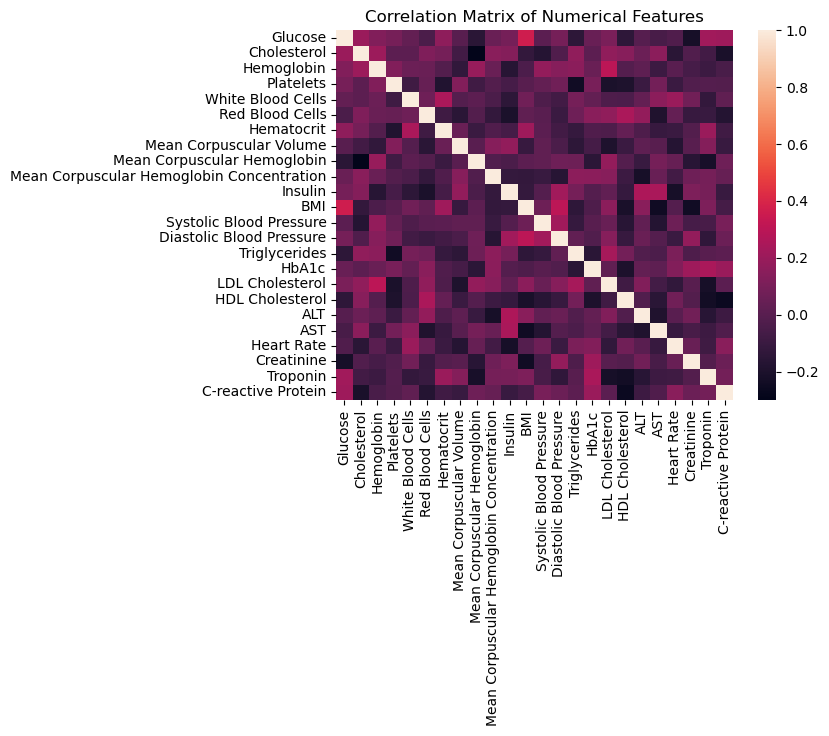

In [79]:
sns.heatmap(correlation_matrix,)
plt.title("Correlation Matrix of Numerical Features")

## Exploratory Data Analysis (EDA)

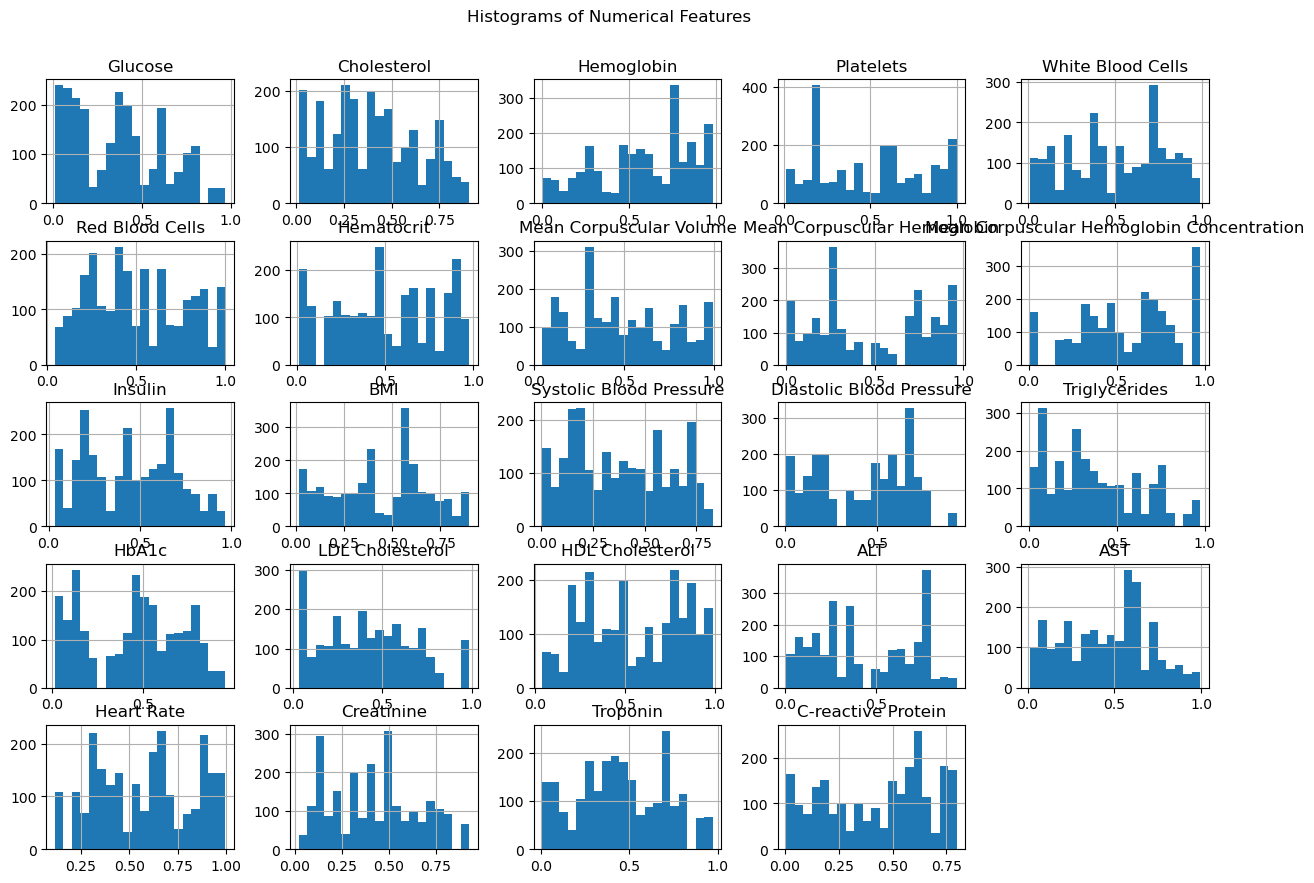

In [80]:
# Histograms of numerical features
df_train[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=0.95)
plt.show()


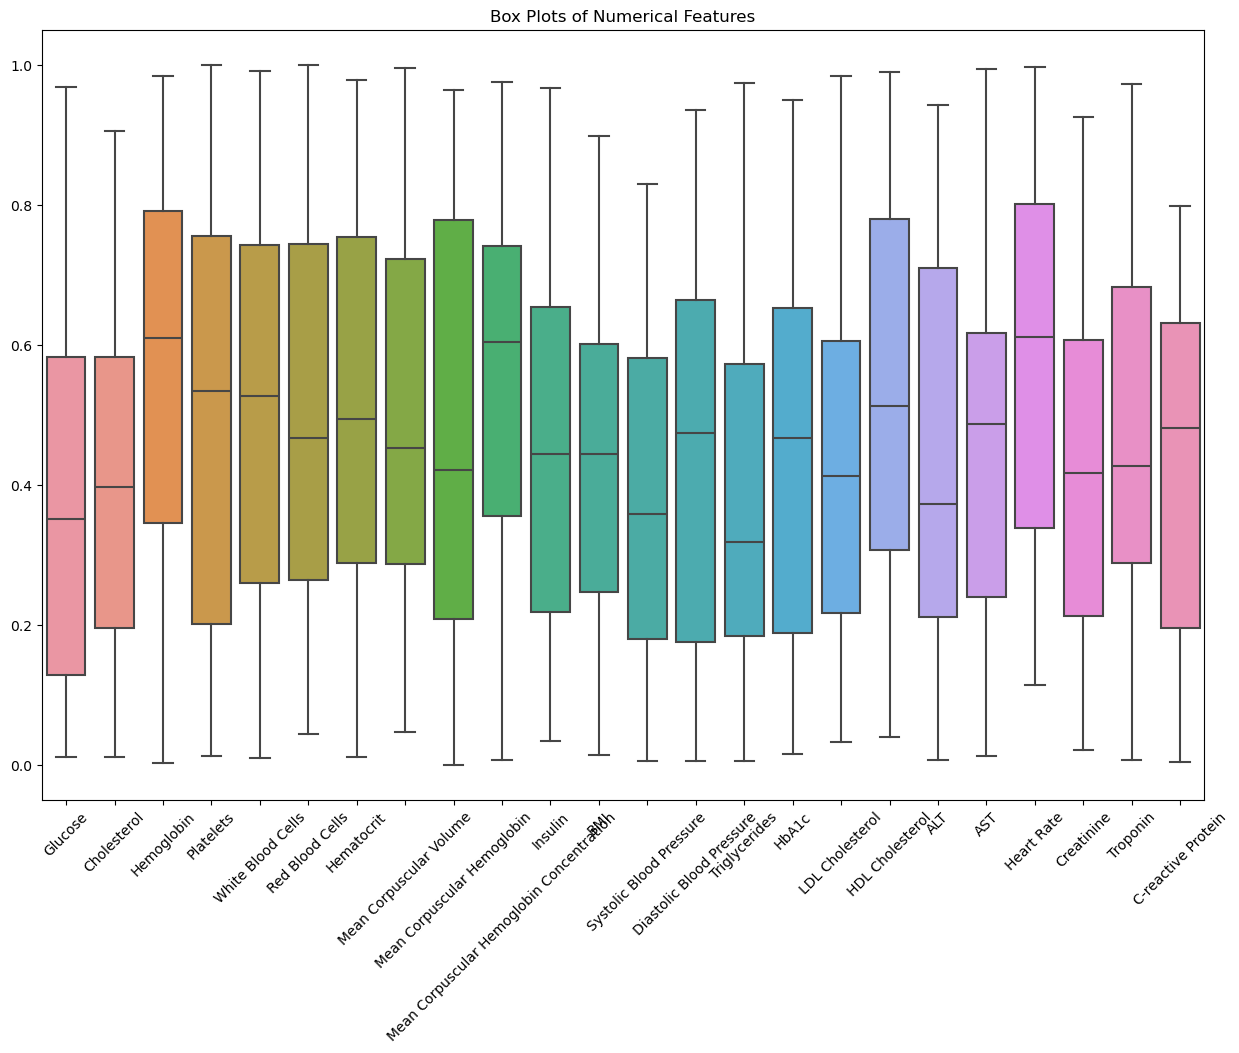

In [81]:
# Box plots of numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_train[numerical_cols])
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

## Model Selection and Training

In [82]:
# Define a dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy ({type(classifier).__name__}): {accuracy:.4f}")
    
    # Display classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [83]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [84]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"Training and Evaluating {clf_name}...")
    train_and_evaluate_classifier(clf, X_train, Y_train, X_test, Y_test)
    print()

Training and Evaluating Decision Tree...
Test Set Accuracy (DecisionTreeClassifier): 1.0000
Classification Report:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]

Training and Evaluating Random Forest...
Test Set Accuracy (RandomForestClassifier): 1.0000
Classification Report:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Train-Test Split:

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state =2)

In [86]:
Y_train.count()

1880

In [87]:
Y_train.value_counts()

Disease
Anemia      498
Healthy     445
Diabetes    432
Thalasse    407
Thromboc     98
Name: count, dtype: int64

In [88]:
Y_test.value_counts()

Disease
Anemia      125
Healthy     111
Diabetes    108
Thalasse    102
Thromboc     25
Name: count, dtype: int64

In [89]:
print(X.shape, X_train, X_test.shape)

(2351, 24)        Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
2202  0.620479     0.389207    0.535345   0.790307           0.313630   
1405  0.351722     0.014278    0.898615   0.167550           0.727148   
421   0.136609     0.015605    0.419957   0.191487           0.081168   
1236  0.099702     0.499443    0.242045   0.599439           0.619331   
2155  0.107165     0.603341    0.791215   0.178840           0.718674   
...        ...          ...         ...        ...                ...   
190   0.298953     0.809215    0.781105   0.620757           0.910493   
2297  0.348493     0.312579    0.284949   0.412179           0.916696   
1627  0.099702     0.499443    0.242045   0.599439           0.619331   
1110  0.898222     0.258706    0.933307   0.353082           0.373952   
2247  0.389399     0.462404    0.480595   0.228912           0.781088   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
2202         0.315465    0.329199                 

## Train the Model:

In [90]:
clf.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Evaluate on Test Set:

In [91]:
y_pred = clf.predict(X_test)

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1-score with appropriate averaging method
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[125   0   0   0   0]
 [  0 108   0   0   0]
 [  0   0 111   0   0]
 [  0   0   0 102   0]
 [  0   0   0   0  25]]
